<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/Stochastic/class_05_ABCOptmi_maze_april_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
from random import randint

Rats are particularly gifted at running mazes. Their maze-running ability comes from their evolutionary history: rats are small burrowing rodents that have spent millenia digging and finding their way around underground tunnels. It's no wonder they have a knack with mazes. 

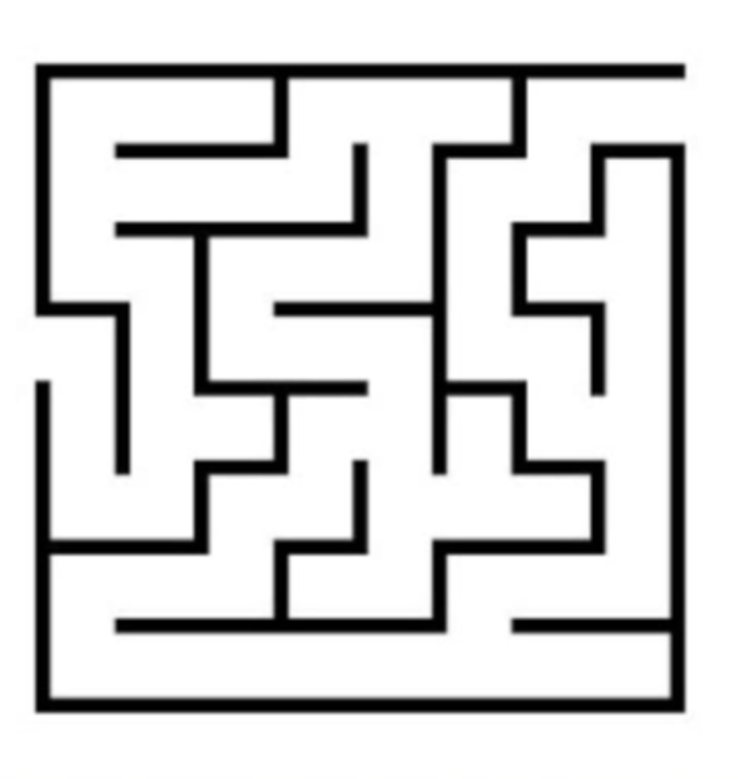

In [21]:
def CalcFit(fun):
    result=0
    if(fun>=0):
      result=1/(fun+1)
    else:
      result=1+abs(fun)
    return result

In [22]:
Graph ={
        11:['L','D'],12:['L','R'],13:['L'],14:['D','R'],
        15:['L','R','D'],16:['L'],17:['D','R'],18:['L','R'],

        21:['R','U','D'],22:['L','R'],23:['L','R'],24:['L','U'],
        25:['U','D'],26:['R','D'],27:['L','U'],28:['D'],

        31:['R','U'],32:['L','D'],33:['R','D'],34:['L','R'],
        35:['L','U'],36:['U','D'],37:['R'],38:['U','D'],  

        41:['D'],42:['U','D'],43:['R','U'],44:['L','R'],
        45:['L','D'],46:['R','U'],47:['L','D'],48:['U','D'],    

        51:['U','D'],52:['R','U','D'],53:['L'],54:['R','D'],
        55:['L','U','D'],56:['D'],57:['R','U'],58:['L','U','D'],

        61:['R','U'],62:['L','U'],63:['R','D'],64:['L','R','U','D'],
        65:['L','R','U','D'],66:['L','R','U'],67:['L'],68:['U','D'],

        71:['R','D'],72:['L','R'],73:['L','R','U'],74:['L','R','U'],
        75:['L','U'],76:['L','D'],77:['L','R'],78:['L','U'],

        81:['R','U'],82:['L','R'],83:['L','R'],84:['L','R'],
        85:['L','R'],86:['L','R','U'],87:['L','R'],88:['L']       
        }

In [23]:
#Find = [41,18]
Find = [18,41]; Graph[18]=['L']
Size  = [8,8]
Distances  = 1
names = list(Graph.keys())

In [24]:
Graph

{11: ['L', 'D'],
 12: ['L', 'R'],
 13: ['L'],
 14: ['D', 'R'],
 15: ['L', 'R', 'D'],
 16: ['L'],
 17: ['D', 'R'],
 18: ['L'],
 21: ['R', 'U', 'D'],
 22: ['L', 'R'],
 23: ['L', 'R'],
 24: ['L', 'U'],
 25: ['U', 'D'],
 26: ['R', 'D'],
 27: ['L', 'U'],
 28: ['D'],
 31: ['R', 'U'],
 32: ['L', 'D'],
 33: ['R', 'D'],
 34: ['L', 'R'],
 35: ['L', 'U'],
 36: ['U', 'D'],
 37: ['R'],
 38: ['U', 'D'],
 41: ['D'],
 42: ['U', 'D'],
 43: ['R', 'U'],
 44: ['L', 'R'],
 45: ['L', 'D'],
 46: ['R', 'U'],
 47: ['L', 'D'],
 48: ['U', 'D'],
 51: ['U', 'D'],
 52: ['R', 'U', 'D'],
 53: ['L'],
 54: ['R', 'D'],
 55: ['L', 'U', 'D'],
 56: ['D'],
 57: ['R', 'U'],
 58: ['L', 'U', 'D'],
 61: ['R', 'U'],
 62: ['L', 'U'],
 63: ['R', 'D'],
 64: ['L', 'R', 'U', 'D'],
 65: ['L', 'R', 'U', 'D'],
 66: ['L', 'R', 'U'],
 67: ['L'],
 68: ['U', 'D'],
 71: ['R', 'D'],
 72: ['L', 'R'],
 73: ['L', 'R', 'U'],
 74: ['L', 'R', 'U'],
 75: ['L', 'U'],
 76: ['L', 'D'],
 77: ['L', 'R'],
 78: ['L', 'U'],
 81: ['R', 'U'],
 82: ['L', 'R'],

In [25]:
matrix =[]
matrix_pos = []
start = []
stop =[]
cont = -1
for i in range(Size[0]):
  rows =[]
  rows_pos =[]
  for j in range(Size[1]):
    cont += 1
    rows.append(names[cont])
    rows_pos.append([i,j])
    if names[cont] == Find[0]:
      start =[i,j]
    elif names[cont]== Find[1]:
      stop = [i,j]
  matrix.append(rows)
  matrix_pos.append(rows_pos)
Find = [start,stop]
num = len(names)

In [26]:
matrix

[[11, 12, 13, 14, 15, 16, 17, 18],
 [21, 22, 23, 24, 25, 26, 27, 28],
 [31, 32, 33, 34, 35, 36, 37, 38],
 [41, 42, 43, 44, 45, 46, 47, 48],
 [51, 52, 53, 54, 55, 56, 57, 58],
 [61, 62, 63, 64, 65, 66, 67, 68],
 [71, 72, 73, 74, 75, 76, 77, 78],
 [81, 82, 83, 84, 85, 86, 87, 88]]

In [27]:
def grafo_fun(x,f=Find,m=matrix,mp = matrix_pos,g=Graph, n= num, ans= False):
   idx, idy = f[0] #start and will change
   idx0, idy0 = f[0] # start
   get_seq, get_dir, get_dis  =[], [], 0
   get_seq.append(m[idx][idy])
   idxf, idyf = f[1] #end
   find = m[idxf][idyf]
   get_dir.append([idx,idy])
   id = 0
   cont = 0
   ref = 10
   for xi in x:
    rdn =np.random.random()
    cont += 1
    '''
    if cont == ref:
      vector = ['No'] 
      cont = 0
    else:
      vector = []
    '''
    vector = ['No']
    word = get_seq[id]
    #print('id ==',id, get_seq, g[word])
    for wi in g[word]:
      vector.append(wi)
    #print(vector)
    
    N = len(vector)
    r = 1/N
    total = 0
    for i in range(N):
      total += r
      if xi <= total:
        k = i
        break
    if vector[k] == 'L':
      idy -= 1
    elif vector[k] == 'R':
      idy += 1
    elif vector[k] == 'U':
      idx -= 1
    elif vector[k] == 'D':
      idx += 1
    else:  # option not accept any of the choices
      pass # not change the indexes !!!
    if idx == -1:
      idx = 0
    if idy == -1:
      idy = 0
    if vector[k] != 'No':
      get_seq.append(m[idx][idy])
      get_dir.append([idx,idy])
      id += 1

    #get_dis = abs(idx-idx0) + abs(idy-idy0) + abs(idx-idxf) + abs(idy-idyf)
    get_dis =  abs(idx-idxf) + abs(idy-idyf) # Manhatan distance

   if ans == True:
     return get_seq, get_dir,get_dis
   else:
     return get_dis
    


In [28]:
function = grafo_fun


In [29]:
def BestSource(GlobMin,GlobPars,Foods):
  FoodNumber=len(Foods[:,0])
  D=len(Foods[0,:])
  solution=np.zeros(D)
  for i in range(FoodNumber):
    if (f[i]<GlobMin):
      GlobMin=f[i]
      for j in range(D):
        GlobPars[j]=Foods[i,j]
  return GlobMin,GlobPars,Foods

In [30]:
def init(index,Foods,trial,f,fitness,MIN,MAX):
  D=len(Foods[0,:])
  FoodNumber=len(Foods[:,0])
  solution=np.zeros(D)
  for j in range(D):
    r=np.random.random()
    Foods[index,j]=r*(MAX[j]-MIN[j])+MIN[j]
    solution[j]=Foods[index,j]
    
  f[index]=function(solution)
  fitness[index]=CalcFit(f[index])
  trial[index]=0
  
  return Foods,trial,f,fitness

In [31]:
def initial(fitness,trial,f,Foods,GlobMin,GlobPars,MIN,MAX):
  D=len(Foods[0,:])
  FoodNumber=len(Foods[:,0])
  for i in range(FoodNumber):
    Foods,trial,f,fitness=init(i,Foods,trial,f,fitness,MIN,MAX) 
  GlobMin=f[0]
  for i in range(D):
    GlobPars[i]=Foods[0,i]
  return  f,Foods,GlobMin,GlobPars


In [32]:
def EmployedBees(trial,Foods,MIN,MAX):
  FoodNumber=len(Foods[:,0])
  NP=FoodNumber
  D=len(Foods[0,:])
  solution=np.zeros(D)
  for i in range(FoodNumber):
    r = np.random.random()
    par2chan= int(r*D)
    r = np.random.random()
    neighbour=int(r*D)
    if(neighbour >= NP):
      neighbour=NP-1
      
    while(neighbour==i):
      r = np.random.random()
      neighbour=int(r*FoodNumber)
      if(neighbour >= NP):
        neighbour=NP-1
    for j in range(D):
      solution[j]=Foods[i,j]

    r = np.random.random()
    A=Foods[i,par2chan]
    B=Foods[neighbour,par2chan]
    solution[par2chan]=Foods[i,par2chan]+(A-B)*(r-0.5)*2;
    if (solution[par2chan]<MIN[par2chan]):
      solution[par2chan]=MIN[par2chan]
    if (solution[par2chan]>MAX[par2chan]):
      solution[par2chan]=MAX[par2chan]
    ObjValSol=function(solution)
    FitnessSol=CalcFit(ObjValSol)
    
    if(FitnessSol>fitness[i]):
      trial[i]=0
      for j in range(D):
        Foods[i,j]=solution[j]
      f[i]=ObjValSol
      fitness[i]=FitnessSol
    else:
      trial[i]=trial[i]+1 
      
  return trial,Foods

In [33]:
def CalcProb(fitness,prob):
  FoodNumber=len(fitness)
  maxfit=fitness[0]
  for i in range(1,FoodNumber):    
    if (fitness[i]>maxfit):
      maxfit=fitness[i]
  for i in range(FoodNumber):
    prob[i]=(0.9*(fitness[i]/maxfit))+0.1
  return fitness,prob


In [34]:
def OnlookerBees(trial,Foods,MIN,MAX):
  D=len(Foods[0,:])
  solution=np.zeros(D)
  FoodNumber=len(Foods[:,0])
  i=0
  t=0
  while(t<FoodNumber):
    r = np.random.random()
    if(r<prob[i]): 
      r = np.random.random()
      t=t+1
      par2chan=int(r*D)
      r = np.random.random()
      neighbour=int(r*FoodNumber)

      while(neighbour==i):
        r = np.random.random()
        neighbour=int(r*FoodNumber)
      for j in range(D):
        solution[j]=Foods[i,j]

      r = np.random.random()
      A=Foods[i,par2chan]
      B=Foods[neighbour,par2chan]
      solution[par2chan]=A+(A-B)*(r-0.5)*2

      if (solution[par2chan]<MIN[par2chan]):
              solution[par2chan]=MIN[par2chan]
      if (solution[par2chan]>MAX[par2chan]):
              solution[par2chan]=MAX[par2chan]
      ObjValSol=function(solution)
      FitnessSol=CalcFit(ObjValSol)
              
      if(FitnessSol>fitness[i]):
        trial[i]=0
        for j in range(D):
          Foods[i,j]=solution[j]
        f[i]=ObjValSol
        fitness[i]=FitnessSol
      else:
        trial[i]=trial[i]+1
      i=i+1
      if (i==FoodNumber):
        i=0
  return trial,Foods


In [35]:
def ScoutBees(fitness,f,Foods,trial,MIN,MAX):
  FoodNumber=len(Foods[:,0])
  max_trial=0
  for i in range(1,FoodNumber):
    if (trial[i]>trial[max_trial]):
      max_trial=i
  if(trial[max_trial]>=limit):
    Foods,trial,f,fitness=init(max_trial,Foods,trial,f,fitness,MIN,MAX)
  return trial,Foods


In [36]:
'''/*Main program of the ABC algorithm*/'''

NPAR=500 #Numero de fontes de comida
ITE=900 #ITERACOES (maxCycle)
PAR=Size[0]*Size[1]*3 #NUM DE PARAMETROS A SER OTIMIZADOS
MAX=[] # MAXIMO DE CADA PARAMETRO
MIN=[] # MINIMO DE CADA PARAMETRO
for k in range(PAR):
  MAX.append(1)
  MIN.append(0)

limit=100 # quantas vezes obtem resposta identica antes de encerrar 
runtime=1 # quantas vezes vai rodar para tirar a media

f=np.zeros(NPAR) 
Foods=np.zeros((NPAR,PAR)) 
solution=np.zeros(PAR)
fitness=np.zeros(NPAR)
trial=np.zeros(NPAR)
prob=np.zeros(NPAR)
GlobPars=np.zeros(PAR)
GlobMins=np.zeros(runtime)
GlobMin=1e99
BestAll = 1e99
for run in range(runtime):
  f,Foods,GlobMin,GlobPars= initial(fitness,trial,f,Foods,GlobMin,GlobPars,MIN,MAX)
  GlobMin,GlobPars,Foods=BestSource(GlobMin,GlobPars,Foods)

  for iter in range(ITE):
    trial,Foods=EmployedBees(trial,Foods,MIN,MAX)
    fitness,prob=CalcProb(fitness,prob)
    trial,Foods=OnlookerBees(trial,Foods,MIN,MAX)
    GlobMin,GlobPars,Foods=BestSource(GlobMin,GlobPars,Foods)
    trial,Foods=ScoutBees(fitness,f,Foods,trial,MIN,MAX)
    if BestAll > GlobMin:
      x_best = GlobPars
      cost_best = GlobMin
    if iter % 100 == 0:
      Nodes, Conditions, Cost =grafo_fun(GlobPars,ans = True)
      print('iter GlobMin',iter, Cost,'Final node:',Nodes[-1], len(Nodes))




  print("run",run+1,"GBest=",GlobMin," \n");
  GlobMins[run]=GlobMin

mean=np.average(GlobMins)
if mean == 1e99:
  x_best = GlobPars

print("Means of",runtime,"runs:",mean,"\n")

iter GlobMin 0 1 Final node: 42 124
iter GlobMin 100 0 Final node: 41 131
iter GlobMin 200 0 Final node: 41 131
iter GlobMin 300 0 Final node: 41 131
iter GlobMin 400 0 Final node: 41 131
iter GlobMin 500 0 Final node: 41 131
iter GlobMin 600 0 Final node: 41 131
iter GlobMin 700 0 Final node: 41 131
iter GlobMin 800 0 Final node: 41 131
run 1 GBest= 0.0  

Means of 1 runs: 0.0 



In [37]:
PAR

192

In [38]:
Nodes, Conditions, Cost =grafo_fun(x_best,ans = True)
print('Nodes',Nodes[-1])
print('Conditions',Conditions)
print('Cost',Cost)
print('GlobPars',GlobPars)

Nodes 41
Conditions [[0, 7], [0, 6], [0, 7], [0, 6], [1, 6], [1, 5], [2, 5], [3, 5], [2, 5], [3, 5], [3, 6], [3, 5], [2, 5], [3, 5], [3, 6], [4, 6], [3, 6], [3, 5], [3, 6], [3, 5], [3, 6], [4, 6], [4, 7], [5, 7], [6, 7], [5, 7], [6, 7], [6, 6], [6, 5], [7, 5], [6, 5], [6, 4], [5, 4], [6, 4], [6, 3], [5, 3], [4, 3], [4, 4], [3, 4], [4, 4], [5, 4], [4, 4], [4, 3], [4, 4], [4, 3], [4, 4], [3, 4], [3, 3], [3, 2], [3, 3], [3, 2], [3, 3], [3, 2], [2, 2], [2, 3], [2, 4], [1, 4], [2, 4], [2, 3], [2, 4], [1, 4], [0, 4], [0, 3], [1, 3], [1, 2], [1, 3], [1, 2], [1, 1], [1, 0], [1, 1], [1, 2], [1, 1], [1, 0], [1, 1], [1, 2], [1, 1], [1, 2], [1, 3], [0, 3], [1, 3], [1, 2], [1, 3], [1, 2], [1, 1], [1, 2], [1, 3], [1, 2], [1, 3], [1, 2], [1, 3], [1, 2], [1, 1], [1, 2], [1, 1], [1, 0], [1, 1], [1, 0], [2, 0], [1, 0], [0, 0], [1, 0], [2, 0], [1, 0], [1, 1], [1, 0], [1, 1], [1, 2], [1, 3], [1, 2], [1, 1], [1, 0], [2, 0], [2, 1], [2, 0], [2, 1], [2, 0], [2, 1], [3, 1], [4, 1], [5, 1], [5, 0], [4, 0], [5,